This script is used to create the illustrative plots using modeled and simulated DIN loads

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import os

In [144]:
# common settings
lab_fontsize = 13
fig_dir = '../output/figs/'

In [145]:
## Read model simulations and calculate the normalized value
dir = '../output/DailyData_run_till_2017_20241125/'
mod_fn_list = os.listdir(dir)
mod_fn_list = [fn for fn in mod_fn_list if '_' in fn]
flow_col = 'Q (m3/s)'; din_load_col = 'Load (t)'
mod_flow_load = pd.read_csv(dir + mod_fn_list[0]).rename(columns={'Unnamed: 0': 'date'}).set_index('date')
mod_flow_load = mod_flow_load[mod_flow_load.index <= '2018-06-30']
mod_flow_load.index = pd.to_datetime(mod_flow_load.index)

dir_measunc = 'code for measurement uncertainty/output/resample_freq100_new_assumption/'
obs_daily_ensmb_fn = 'dailyloadunc.csv'
obs_daily_ensmb = pd.read_csv(dir_measunc + obs_daily_ensmb_fn, header=None, index_col=0)
obs_daily_ensmb.index.name = 'date'
obs_daily_ensmb.index = pd.to_datetime(obs_daily_ensmb.index)

## Generate Cumulative Plot

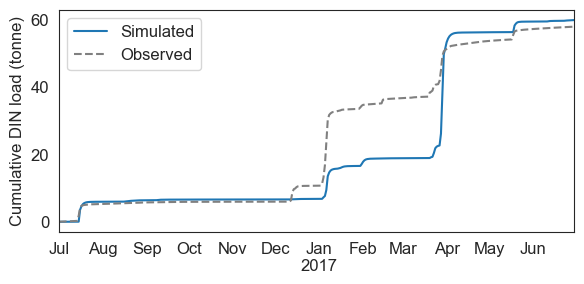

In [152]:
# Plot cumulative plot
fig = sns.set_style('white')
plt.rcParams.update({
    'font.size': 12,               # 控制默认文本大小
    'axes.titlesize': 12,          # 坐标轴标题大小
    'axes.labelsize': 12,          # 坐标轴标签大小
    'xtick.labelsize': 12,         # x轴刻度标签大小
    'ytick.labelsize': 12,         # y轴刻度标签大小
    'legend.fontsize': 12,         # 图例字体大小
    'figure.titlesize': 12         # 图形总标题大小
})
ax = mod_flow_load.loc['2016-07-01':'2017-06-30', din_load_col].cumsum().plot(label  = 'Simulated', figsize=(6, 3))
obs_daily_ensmb.loc['2016-07-01':'2017-06-30', 1].cumsum().plot(ax=ax, label  = 'Observed', color = 'grey', ls = '--')
plt.legend()
plt.ylabel('Cumulative DIN load (tonne)')
plt.xlabel('')
plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/cumulative_plot.png', dpi=300)

# Generate Load Duration Curve

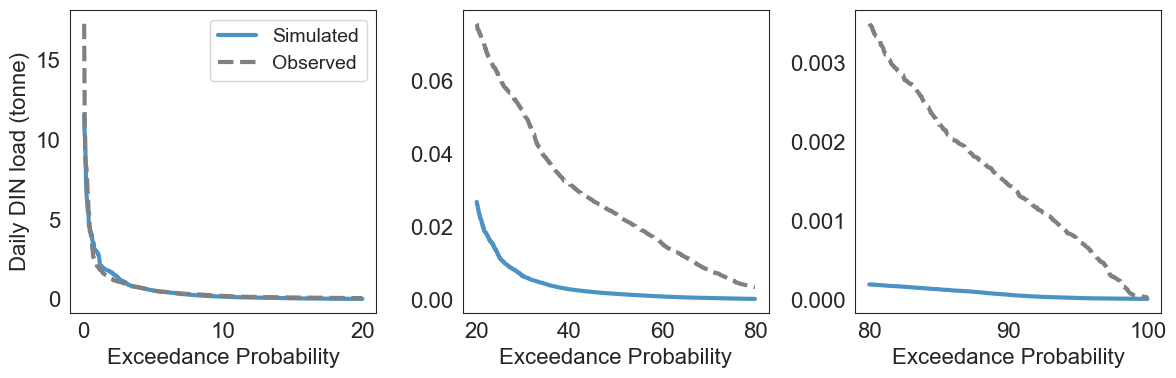

In [55]:
# Plot load duration curve
selected_time_period = ['2009-07-01', '2017-06-30']
sorted_mod_load = mod_flow_load.loc[selected_time_period[0]:selected_time_period[1], din_load_col].sort_values(ascending=False).reset_index()
sorted_mod_load['Exceedance Probability'] = 100 * (sorted_mod_load.index / len(sorted_mod_load))
# ax = plt.plot(mod_percentage, sorted_mod_load[din_load_col], label = 'Simulated')
# 定义分段
sorted_mod_load['Segment'] = pd.cut(sorted_mod_load['Exceedance Probability'], 
                      bins=[0, 20, 80, 100],
                      labels=['Peak (0-20%)', 'Intermediate (20-80%)', 'Base (80-100%)'])

# Process observed data
sorted_obs_load = obs_daily_ensmb.loc[selected_time_period[0]:selected_time_period[1], 1].sort_values(ascending=False).reset_index()
sorted_obs_load['Exceedance Probability'] = 100 * (sorted_obs_load.index / len(sorted_obs_load))
# ax = plt.plot(mod_percentage, sorted_mod_load[din_load_col], label = 'Simulated')
# 定义分段
sorted_obs_load['Segment'] = pd.cut(sorted_obs_load['Exceedance Probability'], 
                      bins=[0, 20, 80, 100],
                      labels=['Peak (0-20%)', 'Intermediate (20-80%)', 'Base (80-100%)'])
# 绘制分段图表
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize=(12, 4))
# 设置全局字体大小
plt.rcParams.update({
    'font.size': 14,               # 控制默认文本大小
    'axes.titlesize': 16,          # 坐标轴标题大小
    'axes.labelsize': 16,          # 坐标轴标签大小
    'xtick.labelsize': 16,         # x轴刻度标签大小
    'ytick.labelsize': 16,         # y轴刻度标签大小
    'legend.fontsize': 14,         # 图例字体大小
    'figure.titlesize': 18         # 图形总标题大小
})
sns.set_style("white")
# Plot data with percentage <= 20%
sns.lineplot(data = sorted_mod_load[sorted_mod_load['Segment'] == 'Peak (0-20%)'], x = 'Exceedance Probability', 
             y = din_load_col, label = 'Simulated', ax = axes[0], linewidth = 3, alpha = 0.8)
sns.lineplot(data = sorted_obs_load[sorted_obs_load['Segment'] == 'Peak (0-20%)'], x = 'Exceedance Probability', 
             y = 1, label = 'Observed', ax = axes[0], color = 'grey', ls = '--', linewidth = 3)
# Plot data with 20% <percentage <= 80%
sns.lineplot(data = sorted_mod_load[sorted_mod_load['Segment'] == 'Intermediate (20-80%)'], 
             x = 'Exceedance Probability', y = din_load_col, ax = axes[1], linewidth = 3, alpha = 0.8)
sns.lineplot(data = sorted_obs_load[sorted_obs_load['Segment'] == 'Intermediate (20-80%)'], 
             x = 'Exceedance Probability', y = 1, ax = axes[1], color = 'grey', ls = '--', linewidth = 3)
# Plot data with 80% <percentage
sns.lineplot(data = sorted_mod_load[sorted_mod_load['Segment'] == 'Base (80-100%)'], 
             x = 'Exceedance Probability', y = din_load_col, ax = axes[2], linewidth = 3, alpha = 0.8)
sns.lineplot(data = sorted_obs_load[sorted_obs_load['Segment'] == 'Base (80-100%)'], 
             x = 'Exceedance Probability', y = 1, ax = axes[2], color = 'grey', ls = '--', linewidth = 3)
axes[0].set_ylabel('Daily DIN load (tonne)')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
# axes[0].text(0.1, 0.9, "(a)", fontsize=15, transform=axes[0].transAxes)
# axes[1].text(0.1, 0.9, "(b)", fontsize=15, transform=axes[1].transAxes)
# axes[2].text(0.1, 0.9, "(c)", fontsize=15, transform=axes[2].transAxes)
plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/load_duration_curve.png', dpi=300)

绘制Cumulative Plot

In [8]:
mod_flow_load.reset_index(inplace=True)
obs_daily_ensmb.reset_index(inplace=True)
din_mod = mod_flow_load.resample('M', on='date')[din_load_col].sum()
din_obs = obs_daily_ensmb.resample('M', on='date')[1].sum()
# 按月分组并计算总和
din_mod = mod_flow_load.resample('M', on='date')[din_load_col].sum()
din_obs = obs_daily_ensmb.resample('M', on='date')[1].sum()

In [9]:
## Read sediment data and create the cumulative plot
sed = pd.read_csv('../output/TN_TP_Sed/sediment.csv')
sed.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
sed['date'] = pd.to_datetime(sed['date'])
# 按月分组并计算总和
sed_mod = sed.resample('M', on='date')['Mod_load(t)'].sum()
sed_obs = sed.resample('M', on='date')['Obs_load(t)'].sum()

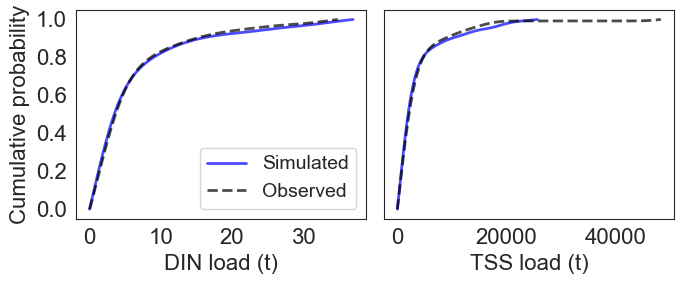

In [8]:
from scipy.stats import gaussian_kde
from scipy.integrate import cumtrapz
fig, axes = plt.subplots(nrows=1, ncols = 2, sharey=True, figsize=(7, 3))
# din_mod = mod_flow_load.loc['2016-07-01':'2017-06-30', din_load_col].values
# din_obs = obs_daily_ensmb.loc['2016-07-01':'2017-06-30', 1].values
# Create the plot using DIN and sediment load
# Modelled 
for color, ls, data, lgd in zip(['blue', 'black'], ['-', '--'], [din_mod, din_obs], ['Simulated', 'Observed']):
    # 用KDE估计概率密度函数（PDF）
    kde = gaussian_kde(data)
    x_grid = np.linspace(min(data), max(data), 100)  # 精细网格
    pdf = kde.evaluate(x_grid)

    # 数值积分PDF得到CDF（累积分布函数）
    cdf = cumtrapz(pdf, x_grid, initial=0)
    cdf = cdf / cdf[-1]  # 归一化到[0, 1]
    # 绘制平滑CDF曲线
    axes[0].plot(x_grid, cdf, color = color, ls = ls, lw=2, alpha=0.7, label = lgd)
axes[0].legend()

# Create the plot using sediment load
# Modelled 
for color, ls, data, lgd in zip(['blue', 'black'], ['-', '--'], [sed_mod, sed_obs], ['Simulated', 'Observed']):
    # 用KDE估计概率密度函数（PDF）
    kde = gaussian_kde(data)
    x_grid = np.linspace(min(data), max(data), 100)  # 精细网格
    pdf = kde.evaluate(x_grid)

    # 数值积分PDF得到CDF（累积分布函数）
    cdf = cumtrapz(pdf, x_grid, initial=0)
    cdf = cdf / cdf[-1]  # 归一化到[0, 1]
    # 绘制平滑CDF曲线
    axes[1].plot(x_grid, cdf, color = color, ls = ls, lw=2, alpha=0.7)
axes[0].set_xlabel('DIN load (t)')
axes[1].set_xlabel('TSS load (t)')
axes[0].set_ylabel('Cumulative probability')
plt.rcParams.update({
    'font.size': 12,               # 控制默认文本大小
    'axes.titlesize': 12,          # 坐标轴标题大小
    'axes.labelsize': 12,          # 坐标轴标签大小
    'xtick.labelsize': 12,         # x轴刻度标签大小
    'ytick.labelsize': 12,         # y轴刻度标签大小
    'legend.fontsize': 12,         # 图例字体大小
    'figure.titlesize': 12         # 图形总标题大小
})
plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/cumulative distribution plot.png', dpi=300)

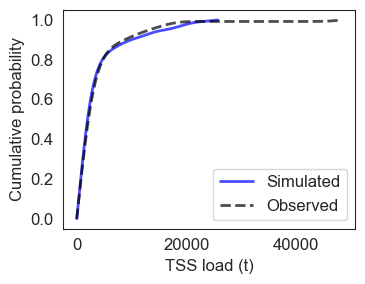

In [24]:
from scipy.stats import gaussian_kde
from scipy.integrate import cumtrapz
fig, axes = plt.subplots(nrows=1, ncols = 1, sharey=True, figsize=(4, 3))
# din_mod = mod_flow_load.loc['2016-07-01':'2017-06-30', din_load_col].values
# din_obs = obs_daily_ensmb.loc['2016-07-01':'2017-06-30', 1].values
# Create the plot using DIN and sediment load
# Create the plot using sediment load
# Modelled 
for color, ls, data, lgd in zip(['blue', 'black'], ['-', '--'], [sed_mod, sed_obs], ['Simulated', 'Observed']):
    # 用KDE估计概率密度函数（PDF）
    kde = gaussian_kde(data)
    x_grid = np.linspace(min(data), max(data), 100)  # 精细网格
    pdf = kde.evaluate(x_grid)

    # 数值积分PDF得到CDF（累积分布函数）
    cdf = cumtrapz(pdf, x_grid, initial=0)
    cdf = cdf / cdf[-1]  # 归一化到[0, 1]
    # 绘制平滑CDF曲线
    axes.plot(x_grid, cdf, color = color, ls = ls, lw=2, alpha=0.7, label = lgd)
axes.set_xlabel('TSS load (t)')
axes.set_ylabel('Cumulative probability')
plt.rcParams.update({
   'font.size': 12,               # 控制默认文本大小
    'axes.titlesize': 12,          # 坐标轴标题大小
    'axes.labelsize': 12,          # 坐标轴标签大小
    'xtick.labelsize': 12,         # x轴刻度标签大小
    'ytick.labelsize': 12,         # y轴刻度标签大小
    'legend.fontsize': 12,         # 图例字体大小
    'figure.titlesize': 12         # 图形总标题大小
    })
axes.legend()
plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/cumulative distribution plot_TSS.png', dpi=300)

# Create the C-Q plot using the low-frequency observed concentration and simulations.
Note that multiple samples collected within a day wil be converted to an average value.

In [64]:
obs = pd.read_csv('../data/126001A_din_concentrations_conditions.csv').filter(items=['DateTime', 'DIN'])
obs['DateTime'] = pd.to_datetime(obs['DateTime'], format = 'mixed', dayfirst = True)
obs['date_only'] = obs['DateTime'].dt.date
daily_means = obs.groupby('date_only')['DIN'].mean().reset_index()
daily_means.rename(columns={'DIN':'Daily DIN'}, inplace=True)

obs = pd.merge(obs, daily_means, on = 'date_only')
obs.drop_duplicates(subset=['date_only'], inplace = True)

# Read obs flow
obs_flow = pd.read_csv('../data/obs_low_interp_flow.csv')
obs_flow['date_only'] = pd.to_datetime(obs_flow['date'], format = 'mixed', dayfirst = True).dt.date
obs = pd.merge(obs, obs_flow, on = 'date_only').filter(items=['date_only', 'Concentration (mg/L)', 'Q (m3/s)'])

In [65]:
mod_flow_load['Mod conc (mg/L)'] = mod_flow_load['Load (t)'] / mod_flow_load['Q (m3/s)'] * 1000 / 86.4
mod_flow_load.index = pd.to_datetime(mod_flow_load.index)
mod_flow_load.reset_index(inplace=True)
mod_flow_load['date_only'] = mod_flow_load['date'].dt.date
mod_flow_load.filter(items = ['date_only', 'Q (m3)/s', 'Mod conc (mg/L)'])
conc_comp = pd.merge(obs, mod_flow_load, on = 'date_only')
conc_comp.rename(columns={'Q (m3/s)_x': 'Obs Q', 'Q (m3/s)_y': 'Mod Q'}, inplace=True)

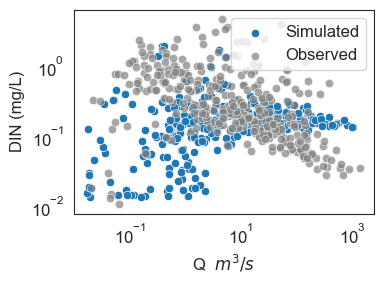

In [11]:
fig = plt.figure(figsize=(4, 3))
# 设置全局字体大小
plt.rcParams.update({
    'font.size': 12,               # 控制默认文本大小
    'axes.titlesize': 12,          # 坐标轴标题大小
    'axes.labelsize': 12,          # 坐标轴标签大小
    'xtick.labelsize': 12,         # x轴刻度标签大小
    'ytick.labelsize': 12,         # y轴刻度标签大小
    'legend.fontsize': 12,         # 图例字体大小
    'figure.titlesize': 18         # 图形总标题大小
})
sns.set_style('white')
ax = sns.scatterplot(data = conc_comp, x = 'Mod Q', y = 'Mod conc (mg/L)', label = 'Simulated')
sns.scatterplot(data = conc_comp, x = 'Obs Q', y = 'Concentration (mg/L)', ax = ax, color ='grey', alpha = 0.7, label = 'Observed')
plt.xlabel(r'Q  ${ m^3/s}$')
plt.ylabel('DIN (mg/L)')
plt.loglog()
plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/CQ_plot.png', dpi=300)

## 绘制correlation plot between TP and TN

In [57]:
## Read observed data
obs_tntp = pd.read_excel('../data/gbr_WhiSun.xlsx', sheet_name = '126001A').filter(items=['DateTime', 'Total nitrogen (mg/L)', 'Total phosphorus (mg/L)'])
obs_tntp['DateTime'] = pd.to_datetime(obs_tntp['DateTime'], format = 'mixed', dayfirst = True)
obs_tntp['date_only'] = pd.to_datetime(obs_tntp['DateTime'].dt.date)
obs_tntp["Total phosphorus (mg/L)"] = pd.to_numeric(
    obs_tntp["Total phosphorus (mg/L)"], 
    errors="coerce"  # 无法转换的（如 "< 0.002"）变成 NaN
)
obs_tntp = obs_tntp.dropna(subset=["Total phosphorus (mg/L)"])
daily_tn_means = obs_tntp.groupby('date_only')['Total nitrogen (mg/L)'].mean().reset_index()
daily_tp_means = obs_tntp.groupby('date_only')['Total phosphorus (mg/L)'].mean().reset_index()
obs_tntp.rename(columns={'Total nitrogen (mg/L)': 'TN (mg/L)', 'Total phosphorus (mg/L)': 'TP (mg/L)'}, inplace=True)
obs_tntp = pd.merge(obs_tntp, daily_tn_means, on = 'date_only')
obs_tntp.drop_duplicates(subset=['date_only'], inplace=True)

In [58]:
# Read modeled data
mod_tntp = pd.read_csv('../output/TN_TP_Sed/TN_TP.csv').rename(columns={'Unnamed: 0': 'date_only'})
mod_tntp['date_only'] = pd.to_datetime(mod_tntp['date_only'])
mod_tntp['TN load (kg)'] = mod_tntp[mod_tntp.columns[2:5]].sum(axis = 1)
mod_tntp['TP load (kg)'] = mod_tntp[mod_tntp.columns[5:8]].sum(axis = 1)
mod_tntp = mod_tntp[mod_tntp['date_only'] >= '2009-07-01']
mod_tntp['mod_TN_conc (mg/L)'] = (mod_tntp['TN load (kg)']/mod_tntp['gauge_126001A_SandyCkHomebush:Downstream Flow Volume'] * 1000)
mod_tntp['mod_TP_conc (mg/L)'] = (mod_tntp['TP load (kg)']/mod_tntp['gauge_126001A_SandyCkHomebush:Downstream Flow Volume'] * 1000)
tntp_comp = pd.merge(obs_tntp, mod_tntp, on='date_only')

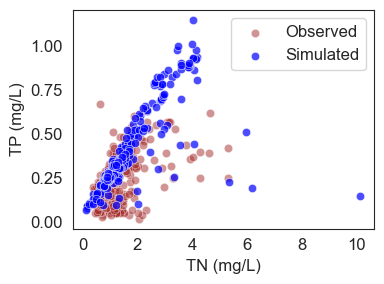

In [64]:
# Create plots
fig = plt.figure(figsize=(4, 3))
ax = sns.scatterplot(data=tntp_comp, x = 'TN (mg/L)', y = 'TP (mg/L)', color = 'brown', alpha = 0.5, label = 'Observed')
sns.scatterplot(data=tntp_comp, x = 'mod_TN_conc (mg/L)', y = 'mod_TP_conc (mg/L)', ax = ax, color = 'blue', alpha = 0.7, label = 'Simulated')
plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/cross_correlation_plot.png', dpi=300)

# Create dotty plots

In [ ]:
# TODO: Data -- observations and modelling
# Scatter plot of obs vs. mod for all years with uncertainty shown as bars
from spotpy.objectivefunctions import nashsutcliffe as nse
from spotpy.objectivefunctions import rsquared
# Read model simulations and observations for DIN load
data_dir = '../output/run_till_2017_20241125/'
fig_dir = '../output/figs/'
fn_obs = 'din_obs_ensemble.csv'
nse_values = []
rsquared_values = []
din_obs = pd.read_csv(data_dir + fn_obs, index_col = 'real_name').drop('DIN_2018', axis=1)
for ii in range(1, 10):
    fn_mod = f'Sandy_Creek.{ii}.obs.csv'
    din_mod = pd.read_csv(data_dir + fn_mod, index_col = 'real_name')
    # Calculate NSE for each realisation with data from din_obs and din_mod
    din_mod.columns = din_obs.columns
    # each row is a realisation and each column is a year
    for row in range(din_obs.shape[0]):
        obs_values = din_obs.iloc[row].values
        mod_values = din_mod.iloc[row].values
        nse_val = nse(obs_values, mod_values)
        nse_values.append(nse_val)
        r2_val = rsquared(obs_values, mod_values)
        rsquared_values.append(r2_val)

# Read parameters
par_all_runs = pd.DataFrame()
for ii in range(1, 10):
    # Read RELATIVE parameter values -- relative values that are normalized to its prior ranges
    par_fn = f'Sandy_Creek.{ii}.par.csv'
    par_df = pd.read_csv(data_dir + par_fn, index_col='real_name')
    par_all_runs = pd.concat([par_all_runs, par_df], axis=0)
    # Read parameters prior and names; The column of ShortName will be used as the x-axis index.
default_pars = pd.read_excel('../data/default_starting_params.xlsx')
    # Read ABSOLUTE parameter values -- relative values that are normalized to its prior ranges
    # Calculate absolute values
abs_par_df = pd.DataFrame(index=par_all_runs.index, columns=par_all_runs.columns)
for ii in range(par_df.shape[1]):
    abs_par_df.iloc[:, ii] = (par_all_runs.iloc[:, ii] - par_all_runs.iloc[:, ii].min())/ 100 * \
        (default_pars['max'][ii]- default_pars['min'][ii]) + \
        default_pars['min'][ii]

In [46]:
abs_par_df.head()

,scale_dl,scale_din,gemc,gdwc,femc,fdwc,cemc,cdwc,oemc,odwc
real_name,,,,,,,,,,
0,0.18331,0.023424,0.08378,0.011749,0.180556,0.000018,0.228533,0.025119,0.70768,0.004808
1,0.023515,0.003996,0.283746,0.003574,0.356793,0.000664,0.023195,0.099999,0.000003,0.004179
2,0.002923,0.0,0.262197,0.027625,0.341986,0.006674,0.015733,0.099999,0.133386,0.027577
3,0.418542,0.021004,0.092383,0.010488,0.190002,0.07789,0.253712,0.034913,0.715178,0.199925
4,0.370629,0.061226,0.208146,0.003484,0.298752,0.00005,0.109122,0.099999,0.877743,0.012029


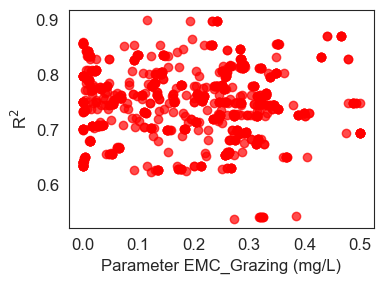

In [48]:
# create scatter plot of NSE vs. parameter values
fig = plt.figure(figsize=(4, 3))
# 设置全局字体大小
plt.rcParams.update({
    'font.size': 12,               # 控制默认文本大小
    'axes.titlesize': 12,          # 坐标轴标题大小
    'axes.labelsize': 12,          # 坐标轴标签大小
    'xtick.labelsize': 12,         # x轴刻度标签大小
    'ytick.labelsize': 12,         # y轴刻度标签大小
    'legend.fontsize': 12,         # 图例字体大小
    'figure.titlesize': 12         # 图形总标题大小
})
# only plot nse>=0
plt.plot(abs_par_df.iloc[:, 2], rsquared_values, 'o', color = 'r', alpha=0.7)
plt.xlabel('Parameter EMC_Grazing (mg/L)')
plt.ylabel(r'R$^2$')
plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/RSQ_vs_EMC_Grazing.png', dpi=300)

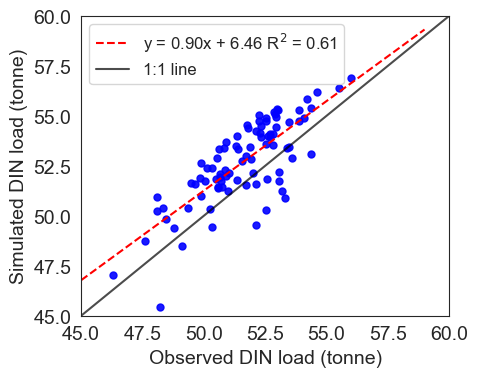

In [142]:
# Plot scater plot comparing observed DIN vs. modeled DIN
fig = plt.figure(figsize=(5, 4))
# 设置全局字体大小
plt.rcParams.update({ 
    'font.size': 14,               # 控制默认文本大小
    'axes.titlesize': 14,          # 坐标轴标题大小
    'axes.labelsize': 14,          # 坐标轴标签大小
    'xtick.labelsize': 14,         # x轴刻度标签大小
    'ytick.labelsize': 14,         # y轴刻度标签大小
})
# drop abs(y - x) > 5
y = din_mod.mean(axis=1).values + 9
x = din_obs.mean(axis=1).values
index_to_keep = np.abs(y - x) <= 3
y = y[index_to_keep]
x = x[index_to_keep]
plt.plot(x, y, color='blue', ls='', marker='o', alpha=0.9, markersize=5)
# add regression line and r2 value
from scipy.stats import linregress
linregression = linregress(x, y)
r_squared = linregression.rvalue ** 2
# plt.text(0.1, 0.9, s = f'R$^2$ = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12)
# Add regression line
func_line = f'y = {linregression.slope:.2f}x + {linregression.intercept:.2f} ' + f'R$^2$ = {r_squared:.2f}'
plt.plot(np.arange(45, 60, 2), linregression.slope * np.arange(45, 60, 2) + linregression.intercept, color='red', ls='--', label=func_line)
# Add the function to figure
# plt.text(0.1, 0.8, s = f'y = {linregression.slope:.2f}x + {linregression.intercept:.2f}', transform=plt.gca().transAxes, fontsize=12)
#
plt.plot([45, 60], [45, 60], color='black', ls='-', label='1:1 line', alpha=0.7)
plt.xlim(45, 60)
plt.ylim(45, 60)
plt.legend(loc = 'upper left', fontsize=12)
plt.xlabel('Observed DIN load (tonne)')
plt.ylabel('Simulated DIN load (tonne)')
plt.tight_layout()
plt.savefig(f'{fig_dir}Illustrative plot/Point and path plot_obs_vs_mod_DIN_load.png', dpi=300)